In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import os
import PIL.Image as img
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path=os.getcwd()
print(path)
paths=pd.read_csv('metadata_indoor.csv')
paths.head()

c:\Users\user\projects\DHaRT


,image_id,clear_image_path,hazy_image_paths
0,1400,clear/1400.png,"['hazy/1400_1.png', 'hazy/1400_2.png', 'hazy/1..."
1,1401,clear/1401.png,"['hazy/1401_1.png', 'hazy/1401_2.png', 'hazy/1..."
2,1402,clear/1402.png,"['hazy/1402_1.png', 'hazy/1402_2.png', 'hazy/1..."
3,1403,clear/1403.png,"['hazy/1403_1.png', 'hazy/1403_2.png', 'hazy/1..."
4,1404,clear/1404.png,"['hazy/1404_1.png', 'hazy/1404_2.png', 'hazy/1..."


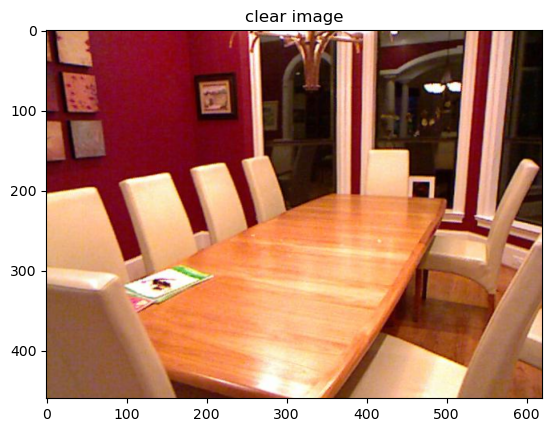

In [5]:
image=img.open(os.path.join(path,'indoor','clear','1400_1.png'))
plt.title('clear image')
plt.imshow(image)

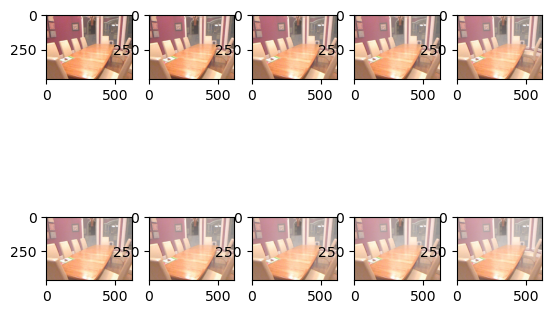

In [6]:
for i in range(0,10):
    image=img.open(os.path.join(path,'indoor','hazy',f'1400_{i+1}.png'))
    plt.subplot(2,5,i+1)
    plt.imshow(image)

In [28]:
from keras.preprocessing.image import ImageDataGenerator

# Set the paths to the directories
hazy_dir = os.path.join(path,'indoor','hazy')
clear_dir = os.path.join(path,'indoor','clear')

# Calculate the number of steps per epoch
batch_size = 32
hazy_images = len(os.listdir(hazy_dir))
clear_images = len(os.listdir(clear_dir))
steps_per_epoch = clear_images // batch_size

# Create the ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the images and create the dataset
train_generator = datagen.flow_from_directory(directory=hazy_dir,
                                              target_size=(620, 460),
                                              batch_size=batch_size,
                                              class_mode=None,
                                              shuffle=False
                                              )

train_labels_generator = datagen.flow_from_directory(directory=clear_dir,
                                                     target_size=(620, 460),
                                                     batch_size=batch_size,
                                                     class_mode=None,
                                                     shuffle=False
                                                     )

# Combine the hazy and clear images into a dataset
train_dataset = zip(train_generator, train_labels_generator)


Found 500 images belonging to 1 classes.
Found 500 images belonging to 1 classes.


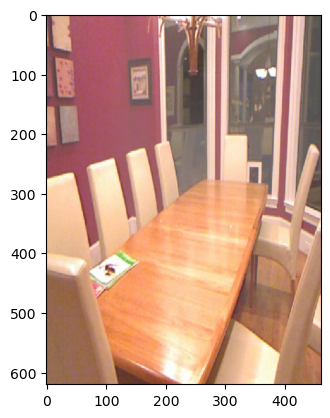

In [29]:
plt.imshow(next(train_dataset)[0][0])

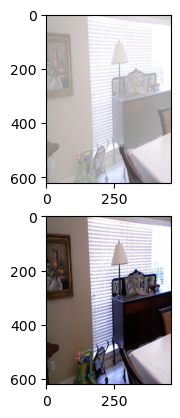

In [33]:
images=next(train_dataset)
plt.subplot(2,1,1)
plt.imshow(images[0][20])
plt.subplot(2,1,2)
plt.imshow(images[1][20])